In [11]:
from PIL import Image
import glob
import random
import uuid
# Load the images you want to stitch
def stitched(IMAGE1,IMAGE2):
    image1 = Image.open(IMAGE1)
    image2 = Image.open(IMAGE2)

    # Get the dimensions of the images
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Determine the dimensions of the stitched image
    stitched_width = width1 + width2
    stitched_height = max(height1, height2)

    # Create a new blank image with the stitched dimensions
    stitched_image = Image.new('RGB', (stitched_width, stitched_height))

    # Paste the images onto the stitched image
    stitched_image.paste(image1, (0, 0))
    stitched_image.paste(image2, (width1, 0))

    # Save the stitched image
    filename = "static/images/giger/stitched"+str(uuid.uuid4()) + ".jpg"
    stitched_image.save(filename)
    print (filename)
    return filename

IMAGE1 = random.choice(glob.glob("static/images/giger/*.jpg"))
IMAGE2 = random.choice(glob.glob("static/images/giger/*.jpg"))
FileName = stitched(IMAGE1,IMAGE2)

static/images/giger/stitcheddc3e990d-9c67-4cb2-bfa0-1e3223935e95.jpg


In [12]:
!ls static/images/giger/stitchedcd793035-fac6-48cb-8065-dd7c3281c8a3.jpg

static/images/giger/stitchedcd793035-fac6-48cb-8065-dd7c3281c8a3.jpg


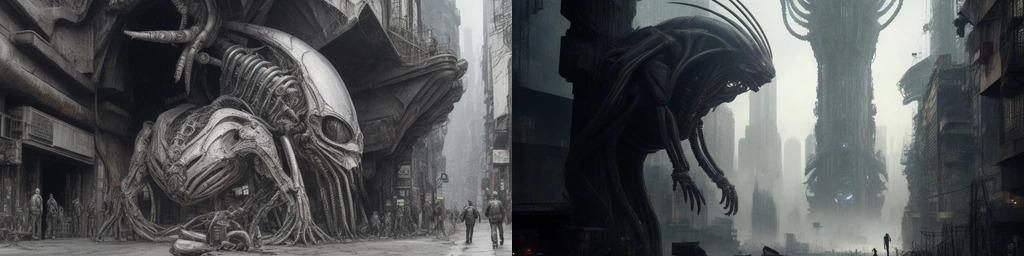

In [13]:
im = Image.open(FileName)
im

In [24]:
from PIL import Image

def blend_images(image1, image2, alpha):
    blended_image = Image.new('RGB', image1.size)

    for x in range(image1.width):
        for y in range(image1.height):
            pixel1 = image1.getpixel((x, y))
            pixel2 = image2.getpixel((x, y))

            blended_pixel = (
                int((1 - alpha) * pixel1[0] + alpha * pixel2[0]),
                int((1 - alpha) * pixel1[1] + alpha * pixel2[1]),
                int((1 - alpha) * pixel1[2] + alpha * pixel2[2])
            )

            blended_image.putpixel((x, y), blended_pixel)

    return blended_image



# Load the images you want to stitch
def stitched(IMAGE1,IMAGE2):

    image1 = Image.open(IMAGE1)
    image2 = Image.open(IMAGE2)

    # Adjust the blending factor (0.0 to 1.0)
    alpha = 0.5

    # Blend the images
    stitched_image = blend_images(image1, image2, alpha)

    # Save the blended image
    filename = "static/images/giger/stitched/"+str(uuid.uuid4()) + ".jpg"
    stitched_image.save(filename)
    return filename
IMAGE1 = random.choice(glob.glob("static/images/giger/*.jpg"))
IMAGE2 = random.choice(glob.glob("static/images/giger/*.jpg"))
FileName = stitched(IMAGE1,IMAGE2)

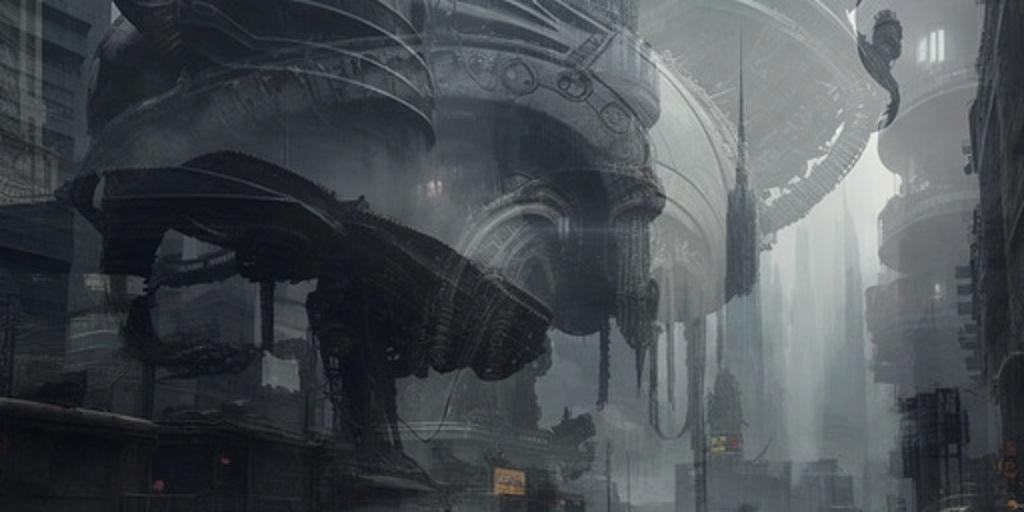

In [25]:
im = Image.open(FileName)
im

In [42]:
from PIL import Image

def stitch_images(IMAGE1,IMAGE2, overlap):
    image1 = Image.open(IMAGE1)
    image2 = Image.open(IMAGE2)
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Create a new canvas large enough to accommodate both images
    new_width = width1 + width2 - overlap
    new_height = max(height1, height2)
    stitched_image = Image.new('RGB', (new_width, new_height))

    # Paste the first image onto the canvas
    stitched_image.paste(image1, (0, 0))

    # Calculate the region to blend and blend the images
    blend_region = (width1 - overlap, 0, width1, new_height)
    blended_region = Image.blend(image1.crop(blend_region), image2.crop(blend_region), alpha=0.5)

    # Paste the blended region of the second image onto the canvas
    stitched_image.paste(blended_region, (width1 - overlap, 0))

    # Paste the remaining portion of the second image onto the canvas
    stitched_image.paste(image2.crop((overlap, 0, width2, new_height)), (width1, 0))

    return stitched_image

for i in range(0,250):# Load the images you want to stitch
    IMAGE1 = random.choice(glob.glob("static/images/giger/*.jpg"))
    IMAGE2 = random.choice(glob.glob("static/images/giger/*.jpg"))
    # Define the overlap width (adjust as needed)
    overlap = 50

    # Stitch the images
    stitched_image = stitch_images(IMAGE1,IMAGE2, overlap)
    print(stitched_image.size)
    # Save the stitched image
    filename = "static/images/giger/stitched/"+str(uuid.uuid4()) + ".jpg"
    stitched_image.save(filename)



(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1888, 512)
(1998, 512)
(1230, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1888, 512)
(1778, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1888, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1230, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(1230, 512)
(1998, 512)
(1998, 512)
(1888, 512)
(123

In [43]:
from PIL import Image

def stitch_images(IMAGE1,IMAGE2, overlap):
    image1 = Image.open(IMAGE1)
    image2 = Image.open(IMAGE2)
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Create a new canvas large enough to accommodate both images
    new_width = width1 + width2 - overlap
    new_height = max(height1, height2)
    stitched_image = Image.new('RGB', (new_width, new_height))

    # Paste the first image onto the canvas
    stitched_image.paste(image1, (0, 0))

    # Calculate the region to blend and blend the images
    blend_region = (width1 - overlap, 0, width1, new_height)
    blended_region = Image.blend(image1.crop(blend_region), image2.crop(blend_region), alpha=0.5)

    # Paste the blended region of the second image onto the canvas
    stitched_image.paste(blended_region, (width1 - overlap, 0))

    # Paste the remaining portion of the second image onto the canvas
    stitched_image.paste(image2.crop((overlap, 0, width2, new_height)), (width1, 0))

    return stitched_image

for i in range(0,250):# Load the images you want to stitch
    IMAGE1 = random.choice(glob.glob("static/images/giger/stitched/long/*.jpg"))
    IMAGE2 = random.choice(glob.glob("static/images/giger/stitched/long/*.jpg"))
    # Define the overlap width (adjust as needed)
    overlap = 50

    # Stitch the images
    stitched_image = stitch_images(IMAGE1,IMAGE2, overlap)
    print(stitched_image.size)

    # Save the stitched image
    filename = "static/images/giger/stitched/long/longest/"+str(uuid.uuid4()) + ".jpg"
    stitched_image.save(filename)





(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(7842, 512)
(784

In [58]:
from PIL import Image

def stitch_images(IMAGE1,IMAGE2, overlap):
    image1 = Image.open(IMAGE1)
    image2 = Image.open(IMAGE2)
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Create a new canvas large enough to accommodate both images
    new_width = width1 + width2 - overlap
    new_height = max(height1, height2)
    stitched_image = Image.new('RGB', (new_width, new_height))

    # Paste the first image onto the canvas
    stitched_image.paste(image1, (0, 0))

    # Calculate the region to blend and blend the images
    blend_region = (width1 - overlap, 0, width1, new_height)
    blended_region = Image.blend(image1.crop(blend_region), image2.crop(blend_region), alpha=0.5)

    # Paste the blended region of the second image onto the canvas
    stitched_image.paste(blended_region, (width1 - overlap, 0))

    # Paste the remaining portion of the second image onto the canvas
    stitched_image.paste(image2.crop((overlap, 0, width2, new_height)), (width1, 0))

    return stitched_image

for i in range(0,2):# Load the images you want to stitch
    IMAGE1 = random.choice(glob.glob("static/images/giger/stitched/long/longest/*.jpg"))
    IMAGE2 = random.choice(glob.glob("static/images/giger/stitched/long/longest/*.jpg"))
    # Define the overlap width (adjust as needed)
    overlap = 50

    # Stitch the images
    stitched_image = stitch_images(IMAGE1,IMAGE2, overlap)
    print(stitched_image.size)

    # Save the stitched image
    filename = "static/images/giger/superlong"+str(uuid.uuid4()) + ".jpg"
    stitched_image.save(filename)





(15634, 512)
(15634, 512)


In [63]:
!ls static/images/giger/superlong*

static/images/giger/superlong3889669f-bc39-40b7-9518-6ec8eb9bb46c.jpg
static/images/giger/superlongd7c865c1-4663-4d56-a348-f0d2f77b553e.jpg


In [66]:
import numpy as np
from moviepy.editor import VideoClip

# Load the wide image
image_path =  random.choice(glob.glob("static/images/giger/superlongd7c865c1-4663-4d56-a348-f0d2f77b553e.jpg"))
image_path = "static/images/giger/superlong3889669f-bc39-40b7-9518-6ec8eb9bb46c.jpg"
#image_clip = VideoFileClip(image_path, audio=False)

image = np.array(Image.open(image_path))

# Set parameters
output_size = (768, 512)  # Output video dimensions
#scroll_speed = 50  # Pixels per second
scroll_speed = 10  # Pixels per second
# Function to generate frames for the scrolling video
def make_frame(t):
    x_offset = int(t * scroll_speed)
    frame = image[:, x_offset:x_offset + output_size[0], :]
    return frame

# Create the scrolling video clip
duration = image.shape[1] / scroll_speed  # Total duration to scroll the entire image
scrolling_video = VideoClip(make_frame, duration=duration)

# Resize the video to the desired output size
scrolling_video = scrolling_video.resize(output_size)

# Save the scrolling video as scrolling_video.mp4
output_path = 'scrolling_videolongest11w.mp4'
scrolling_video.write_videofile(output_path, codec='libx264', fps=30)


                                                                     

                                                               
t:   1%|              | 3/368 [49:27<100:17:08, 989.12s/it, now=None]

t:   7%|█               | 404/5760 [44:55<00:58, 91.28it/s, now=None]
                                                                     

                                                               
t:   1%|              | 3/368 [49:27<100:17:11, 989.13s/it, now=None]

t:   1%|               | 3/368 [48:28<98:18:23, 969.60s/it, now=None]

Moviepy - Building video scrolling_videolongest11w.mp4.
Moviepy - Writing video scrolling_videolongest11w.mp4






t:   0%|                         | 0/46902 [00:00<?, ?it/s, now=None]


t:   0%|               | 22/46902 [00:00<03:34, 218.75it/s, now=None]


t:   0%|               | 44/46902 [00:00<04:19, 180.35it/s, now=None]


t:   0%|               | 63/46902 [00:00<06:39, 117.20it/s, now=None]


t:   0%|               | 77/46902 [00:00<07:18, 106.72it/s, now=None]


t:   0%|               | 89/46902 [00:00<07:40, 101.59it/s, now=None]


t:   0%|               | 100/46902 [00:00<08:44, 89.18it/s, now=None]


t:   0%|               | 110/46902 [00:01<09:06, 85.67it/s, now=None]


t:   0%|               | 119/46902 [00:01<09:31, 81.87it/s, now=None]


t:   0%|               | 130/46902 [00:01<09:00, 86.57it/s, now=None]


t:   0%|               | 139/46902 [00:01<09:16, 83.99it/s, now=None]


t:   0%|               | 148/46902 [00:01<11:05, 70.25it/s, now=None]


t:   0%|               | 156/46902 [00:01<12:58, 60.07it/s, now=None]


t:   0%|               | 165/46902 [00:01<11:54, 65.41it/s, n

t:   4%|▌             | 2054/46902 [00:23<08:19, 89.87it/s, now=None]


t:   4%|▌             | 2064/46902 [00:23<08:17, 90.13it/s, now=None]


t:   4%|▌             | 2076/46902 [00:23<07:41, 97.12it/s, now=None]


t:   4%|▌            | 2087/46902 [00:24<07:25, 100.61it/s, now=None]


t:   4%|▋             | 2098/46902 [00:24<07:29, 99.67it/s, now=None]


t:   4%|▌            | 2109/46902 [00:24<07:25, 100.48it/s, now=None]


t:   5%|▌            | 2122/46902 [00:24<06:55, 107.88it/s, now=None]


t:   5%|▌            | 2133/46902 [00:24<07:03, 105.83it/s, now=None]


t:   5%|▌            | 2144/46902 [00:24<07:01, 106.17it/s, now=None]


t:   5%|▌            | 2155/46902 [00:24<07:04, 105.46it/s, now=None]


t:   5%|▌            | 2167/46902 [00:24<06:48, 109.39it/s, now=None]


t:   5%|▌            | 2178/46902 [00:24<07:18, 101.88it/s, now=None]


t:   5%|▌            | 2191/46902 [00:24<06:53, 108.11it/s, now=None]


t:   5%|▌            | 2203/46902 [00:25<06:47, 109.57it/s, now=

t:   9%|█▎            | 4298/46902 [00:45<07:29, 94.79it/s, now=None]


t:   9%|█▎            | 4308/46902 [00:46<07:35, 93.46it/s, now=None]


t:   9%|█▎            | 4319/46902 [00:46<07:24, 95.89it/s, now=None]


t:   9%|█▎            | 4330/46902 [00:46<07:09, 99.03it/s, now=None]


t:   9%|█▏           | 4341/46902 [00:46<07:05, 100.06it/s, now=None]


t:   9%|█▏           | 4352/46902 [00:46<06:56, 102.28it/s, now=None]


t:   9%|█▎            | 4363/46902 [00:46<07:35, 93.49it/s, now=None]


t:   9%|█▎            | 4374/46902 [00:46<07:25, 95.54it/s, now=None]


t:   9%|█▏           | 4387/46902 [00:46<06:54, 102.64it/s, now=None]


t:   9%|█▏           | 4398/46902 [00:46<06:55, 102.34it/s, now=None]


t:   9%|█▏           | 4409/46902 [00:47<06:55, 102.32it/s, now=None]


t:   9%|█▏           | 4420/46902 [00:47<07:02, 100.49it/s, now=None]


t:   9%|█▏           | 4431/46902 [00:47<06:55, 102.20it/s, now=None]


t:   9%|█▎            | 4442/46902 [00:47<07:09, 98.77it/s, now=

t:  14%|█▉            | 6457/46902 [01:08<07:25, 90.74it/s, now=None]


t:  14%|█▉            | 6467/46902 [01:08<07:24, 90.93it/s, now=None]


t:  14%|█▉            | 6477/46902 [01:08<07:43, 87.23it/s, now=None]


t:  14%|█▉            | 6486/46902 [01:08<07:48, 86.20it/s, now=None]


t:  14%|█▉            | 6495/46902 [01:08<07:53, 85.28it/s, now=None]


t:  14%|█▉            | 6506/46902 [01:08<07:24, 90.92it/s, now=None]


t:  14%|█▉            | 6516/46902 [01:09<07:13, 93.18it/s, now=None]


t:  14%|█▉            | 6526/46902 [01:09<07:12, 93.37it/s, now=None]


t:  14%|█▉            | 6536/46902 [01:09<07:04, 94.99it/s, now=None]


t:  14%|█▉            | 6546/46902 [01:09<07:02, 95.42it/s, now=None]


t:  14%|█▉            | 6556/46902 [01:09<07:05, 94.79it/s, now=None]


t:  14%|█▊           | 6568/46902 [01:09<06:40, 100.68it/s, now=None]


t:  14%|█▊           | 6580/46902 [01:09<06:30, 103.17it/s, now=None]


t:  14%|█▊           | 6591/46902 [01:09<06:33, 102.49it/s, now=

t:  18%|██▌           | 8502/46902 [01:30<06:55, 92.43it/s, now=None]


t:  18%|██▌           | 8512/46902 [01:30<07:04, 90.36it/s, now=None]


t:  18%|██▌           | 8523/46902 [01:30<06:46, 94.36it/s, now=None]


t:  18%|██▌           | 8533/46902 [01:31<06:53, 92.82it/s, now=None]


t:  18%|██▌           | 8543/46902 [01:31<06:48, 93.96it/s, now=None]


t:  18%|██▌           | 8553/46902 [01:31<07:09, 89.39it/s, now=None]


t:  18%|██▌           | 8562/46902 [01:31<07:18, 87.37it/s, now=None]


t:  18%|██▌           | 8573/46902 [01:31<06:56, 92.05it/s, now=None]


t:  18%|██▌           | 8584/46902 [01:31<06:42, 95.24it/s, now=None]


t:  18%|██▌           | 8594/46902 [01:31<06:46, 94.16it/s, now=None]


t:  18%|██▌           | 8604/46902 [01:31<06:52, 92.91it/s, now=None]


t:  18%|██▌           | 8614/46902 [01:31<07:05, 90.06it/s, now=None]


t:  18%|██▌           | 8624/46902 [01:32<06:57, 91.67it/s, now=None]


t:  18%|██▌           | 8634/46902 [01:32<06:52, 92.73it/s, now=

t:  23%|██▉          | 10555/46902 [01:53<06:37, 91.38it/s, now=None]


t:  23%|██▉          | 10565/46902 [01:53<06:43, 90.11it/s, now=None]


t:  23%|██▉          | 10576/46902 [01:53<06:20, 95.35it/s, now=None]


t:  23%|██▉          | 10586/46902 [01:53<06:42, 90.13it/s, now=None]


t:  23%|██▉          | 10596/46902 [01:53<06:33, 92.31it/s, now=None]


t:  23%|██▉          | 10606/46902 [01:53<06:37, 91.39it/s, now=None]


t:  23%|██▉          | 10616/46902 [01:53<06:45, 89.54it/s, now=None]


t:  23%|██▉          | 10626/46902 [01:54<06:46, 89.15it/s, now=None]


t:  23%|██▉          | 10635/46902 [01:54<06:54, 87.49it/s, now=None]


t:  23%|██▉          | 10644/46902 [01:54<07:02, 85.74it/s, now=None]


t:  23%|██▉          | 10654/46902 [01:54<06:47, 88.96it/s, now=None]


t:  23%|██▉          | 10663/46902 [01:54<06:50, 88.38it/s, now=None]


t:  23%|██▉          | 10673/46902 [01:54<06:44, 89.47it/s, now=None]


t:  23%|██▉          | 10683/46902 [01:54<06:42, 90.07it/s, now=

t:  27%|███▍         | 12581/46902 [02:15<06:10, 92.58it/s, now=None]


t:  27%|███▍         | 12591/46902 [02:15<06:06, 93.57it/s, now=None]


t:  27%|███▍         | 12601/46902 [02:16<06:12, 92.16it/s, now=None]


t:  27%|███▍         | 12611/46902 [02:16<06:09, 92.78it/s, now=None]


t:  27%|███▍         | 12621/46902 [02:16<06:30, 87.80it/s, now=None]


t:  27%|███▌         | 12632/46902 [02:16<06:13, 91.84it/s, now=None]


t:  27%|███▌         | 12643/46902 [02:16<06:00, 94.92it/s, now=None]


t:  27%|███▌         | 12653/46902 [02:16<06:09, 92.72it/s, now=None]


t:  27%|███▌         | 12665/46902 [02:16<05:51, 97.40it/s, now=None]


t:  27%|███▏        | 12676/46902 [02:16<05:39, 100.67it/s, now=None]


t:  27%|███▌         | 12687/46902 [02:16<06:26, 88.53it/s, now=None]


t:  27%|███▌         | 12697/46902 [02:17<06:28, 87.94it/s, now=None]


t:  27%|███▌         | 12707/46902 [02:17<06:18, 90.23it/s, now=None]


t:  27%|███▌         | 12717/46902 [02:17<06:20, 89.90it/s, now=

t:  31%|████         | 14631/46902 [02:38<05:49, 92.44it/s, now=None]


t:  31%|████         | 14641/46902 [02:38<05:49, 92.39it/s, now=None]


t:  31%|████         | 14651/46902 [02:38<05:51, 91.62it/s, now=None]


t:  31%|████         | 14661/46902 [02:38<05:47, 92.83it/s, now=None]


t:  31%|████         | 14671/46902 [02:38<05:47, 92.80it/s, now=None]


t:  31%|████         | 14681/46902 [02:38<05:49, 92.15it/s, now=None]


t:  31%|████         | 14691/46902 [02:38<05:42, 94.01it/s, now=None]


t:  31%|████         | 14701/46902 [02:39<05:58, 89.90it/s, now=None]


t:  31%|████         | 14711/46902 [02:39<05:51, 91.68it/s, now=None]


t:  31%|████         | 14721/46902 [02:39<05:48, 92.30it/s, now=None]


t:  31%|████         | 14731/46902 [02:39<05:53, 91.06it/s, now=None]


t:  31%|████         | 14741/46902 [02:39<05:51, 91.45it/s, now=None]


t:  31%|████         | 14752/46902 [02:39<05:42, 93.83it/s, now=None]


t:  31%|████         | 14763/46902 [02:39<05:27, 98.26it/s, now=

t:  35%|████▌        | 16632/46902 [03:00<05:17, 95.40it/s, now=None]


t:  35%|████▌        | 16642/46902 [03:00<05:20, 94.31it/s, now=None]


t:  36%|████▌        | 16652/46902 [03:01<05:29, 91.80it/s, now=None]


t:  36%|████▌        | 16662/46902 [03:01<05:35, 90.25it/s, now=None]


t:  36%|████▌        | 16672/46902 [03:01<05:29, 91.81it/s, now=None]


t:  36%|████▌        | 16682/46902 [03:01<05:33, 90.56it/s, now=None]


t:  36%|████▋        | 16692/46902 [03:01<05:34, 90.20it/s, now=None]


t:  36%|████▋        | 16702/46902 [03:01<05:31, 91.18it/s, now=None]


t:  36%|████▋        | 16712/46902 [03:01<05:27, 92.17it/s, now=None]


t:  36%|████▋        | 16723/46902 [03:01<05:14, 95.82it/s, now=None]


t:  36%|████▋        | 16733/46902 [03:01<05:17, 95.08it/s, now=None]


t:  36%|████▋        | 16744/46902 [03:02<05:07, 98.11it/s, now=None]


t:  36%|████▋        | 16754/46902 [03:02<05:26, 92.22it/s, now=None]


t:  36%|████▋        | 16764/46902 [03:02<05:31, 90.94it/s, now=

t:  39%|█████        | 18326/46902 [03:25<06:23, 74.52it/s, now=None]


t:  39%|█████        | 18334/46902 [03:25<06:27, 73.65it/s, now=None]


t:  39%|█████        | 18342/46902 [03:25<06:24, 74.33it/s, now=None]


t:  39%|█████        | 18350/46902 [03:25<06:40, 71.25it/s, now=None]


t:  39%|█████        | 18359/46902 [03:26<06:20, 74.92it/s, now=None]


t:  39%|█████        | 18367/46902 [03:26<06:18, 75.45it/s, now=None]


t:  39%|█████        | 18375/46902 [03:26<06:24, 74.19it/s, now=None]


t:  39%|█████        | 18383/46902 [03:26<06:32, 72.67it/s, now=None]


t:  39%|█████        | 18391/46902 [03:26<06:40, 71.22it/s, now=None]


t:  39%|█████        | 18402/46902 [03:26<05:58, 79.44it/s, now=None]


t:  39%|█████        | 18411/46902 [03:26<05:48, 81.83it/s, now=None]


t:  39%|█████        | 18420/46902 [03:26<06:08, 77.21it/s, now=None]


t:  39%|█████        | 18428/46902 [03:26<06:26, 73.69it/s, now=None]


t:  39%|█████        | 18438/46902 [03:27<06:08, 77.31it/s, now=

t:  43%|█████▌       | 20100/46902 [03:48<06:22, 70.09it/s, now=None]


t:  43%|█████▌       | 20108/46902 [03:49<06:27, 69.11it/s, now=None]


t:  43%|█████▌       | 20118/46902 [03:49<05:51, 76.29it/s, now=None]


t:  43%|█████▌       | 20127/46902 [03:49<05:39, 78.80it/s, now=None]


t:  43%|█████▌       | 20136/46902 [03:49<05:35, 79.89it/s, now=None]


t:  43%|█████▌       | 20145/46902 [03:49<05:37, 79.28it/s, now=None]


t:  43%|█████▌       | 20153/46902 [03:49<05:48, 76.85it/s, now=None]


t:  43%|█████▌       | 20165/46902 [03:49<05:09, 86.46it/s, now=None]


t:  43%|█████▌       | 20175/46902 [03:49<04:58, 89.51it/s, now=None]


t:  43%|█████▌       | 20185/46902 [03:49<04:53, 91.17it/s, now=None]


t:  43%|█████▌       | 20195/46902 [03:50<05:00, 88.74it/s, now=None]


t:  43%|█████▌       | 20204/46902 [03:50<04:59, 89.09it/s, now=None]


t:  43%|█████▌       | 20214/46902 [03:50<04:53, 90.97it/s, now=None]


t:  43%|█████▌       | 20225/46902 [03:50<04:41, 94.91it/s, now=

t:  47%|██████       | 21950/46902 [04:11<05:39, 73.60it/s, now=None]


t:  47%|██████       | 21958/46902 [04:12<05:32, 75.01it/s, now=None]


t:  47%|██████       | 21970/46902 [04:12<04:54, 84.60it/s, now=None]


t:  47%|██████       | 21980/46902 [04:12<04:46, 87.00it/s, now=None]


t:  47%|██████       | 21989/46902 [04:12<05:22, 77.25it/s, now=None]


t:  47%|██████       | 21997/46902 [04:12<05:21, 77.43it/s, now=None]


t:  47%|██████       | 22007/46902 [04:12<05:06, 81.16it/s, now=None]


t:  47%|██████       | 22016/46902 [04:12<05:03, 81.97it/s, now=None]


t:  47%|██████       | 22025/46902 [04:12<05:04, 81.76it/s, now=None]


t:  47%|██████       | 22034/46902 [04:12<04:58, 83.43it/s, now=None]


t:  47%|██████       | 22043/46902 [04:13<04:55, 84.09it/s, now=None]


t:  47%|██████       | 22052/46902 [04:13<05:23, 76.84it/s, now=None]


t:  47%|██████       | 22060/46902 [04:13<05:22, 76.98it/s, now=None]


t:  47%|██████       | 22071/46902 [04:13<04:54, 84.35it/s, now=

t:  51%|██████▌      | 23816/46902 [04:34<05:01, 76.53it/s, now=None]


t:  51%|██████▌      | 23824/46902 [04:34<05:02, 76.20it/s, now=None]


t:  51%|██████▌      | 23832/46902 [04:35<04:59, 77.04it/s, now=None]


t:  51%|██████▌      | 23840/46902 [04:35<04:58, 77.21it/s, now=None]


t:  51%|██████▌      | 23850/46902 [04:35<04:38, 82.63it/s, now=None]


t:  51%|██████▌      | 23860/46902 [04:35<04:29, 85.43it/s, now=None]


t:  51%|██████▌      | 23870/46902 [04:35<04:18, 89.13it/s, now=None]


t:  51%|██████▌      | 23881/46902 [04:35<04:07, 93.02it/s, now=None]


t:  51%|██████▌      | 23891/46902 [04:35<04:18, 89.07it/s, now=None]


t:  51%|██████▌      | 23900/46902 [04:35<04:20, 88.44it/s, now=None]


t:  51%|██████▋      | 23909/46902 [04:35<04:23, 87.40it/s, now=None]


t:  51%|██████▋      | 23918/46902 [04:36<04:42, 81.46it/s, now=None]


t:  51%|██████▋      | 23927/46902 [04:36<04:38, 82.41it/s, now=None]


t:  51%|██████▋      | 23936/46902 [04:36<04:40, 81.82it/s, now=

t:  55%|███████      | 25699/46902 [04:57<04:14, 83.24it/s, now=None]


t:  55%|███████▏     | 25708/46902 [04:57<04:12, 83.95it/s, now=None]


t:  55%|███████▏     | 25717/46902 [04:57<04:08, 85.10it/s, now=None]


t:  55%|███████▏     | 25728/46902 [04:57<03:50, 91.79it/s, now=None]


t:  55%|███████▏     | 25738/46902 [04:57<03:48, 92.62it/s, now=None]


t:  55%|███████▏     | 25748/46902 [04:57<03:55, 89.76it/s, now=None]


t:  55%|███████▏     | 25758/46902 [04:57<04:00, 88.06it/s, now=None]


t:  55%|███████▏     | 25767/46902 [04:58<04:01, 87.53it/s, now=None]


t:  55%|███████▏     | 25776/46902 [04:58<04:07, 85.24it/s, now=None]


t:  55%|███████▏     | 25786/46902 [04:58<04:01, 87.56it/s, now=None]


t:  55%|███████▏     | 25795/46902 [04:58<04:19, 81.29it/s, now=None]


t:  55%|███████▏     | 25804/46902 [04:58<04:19, 81.23it/s, now=None]


t:  55%|███████▏     | 25815/46902 [04:58<04:01, 87.49it/s, now=None]


t:  55%|███████▏     | 25825/46902 [04:58<03:55, 89.62it/s, now=

t:  59%|███████▋     | 27547/46902 [05:19<04:18, 74.74it/s, now=None]


t:  59%|███████▋     | 27555/46902 [05:19<04:20, 74.38it/s, now=None]


t:  59%|███████▋     | 27563/46902 [05:20<04:16, 75.47it/s, now=None]


t:  59%|███████▋     | 27571/46902 [05:20<04:12, 76.53it/s, now=None]


t:  59%|███████▋     | 27580/46902 [05:20<04:07, 78.16it/s, now=None]


t:  59%|███████▋     | 27588/46902 [05:20<04:22, 73.47it/s, now=None]


t:  59%|███████▋     | 27596/46902 [05:20<06:01, 53.39it/s, now=None]


t:  59%|███████▋     | 27603/46902 [05:20<05:59, 53.69it/s, now=None]


t:  59%|███████▋     | 27611/46902 [05:20<05:26, 59.10it/s, now=None]


t:  59%|███████▋     | 27618/46902 [05:21<05:17, 60.75it/s, now=None]


t:  59%|███████▋     | 27627/46902 [05:21<04:44, 67.75it/s, now=None]


t:  59%|███████▋     | 27635/46902 [05:21<04:47, 66.96it/s, now=None]


t:  59%|███████▋     | 27642/46902 [05:21<04:58, 64.51it/s, now=None]


t:  59%|███████▋     | 27649/46902 [05:21<04:59, 64.34it/s, now=

t:  63%|████████▏    | 29339/46902 [05:42<03:38, 80.32it/s, now=None]


t:  63%|████████▏    | 29348/46902 [05:42<03:35, 81.64it/s, now=None]


t:  63%|████████▏    | 29357/46902 [05:42<03:39, 80.00it/s, now=None]


t:  63%|████████▏    | 29366/46902 [05:42<03:44, 78.05it/s, now=None]


t:  63%|████████▏    | 29374/46902 [05:43<03:51, 75.65it/s, now=None]


t:  63%|████████▏    | 29383/46902 [05:43<03:42, 78.90it/s, now=None]


t:  63%|████████▏    | 29393/46902 [05:43<03:26, 84.69it/s, now=None]


t:  63%|████████▏    | 29402/46902 [05:43<03:25, 85.04it/s, now=None]


t:  63%|████████▏    | 29412/46902 [05:43<03:15, 89.32it/s, now=None]


t:  63%|████████▏    | 29422/46902 [05:43<03:10, 91.93it/s, now=None]


t:  63%|████████▏    | 29432/46902 [05:43<03:10, 91.66it/s, now=None]


t:  63%|████████▏    | 29442/46902 [05:43<03:12, 90.47it/s, now=None]


t:  63%|████████▏    | 29452/46902 [05:43<03:09, 92.08it/s, now=None]


t:  63%|████████▏    | 29462/46902 [05:44<03:06, 93.47it/s, now=

t:  67%|████████▋    | 31190/46902 [06:05<03:32, 73.98it/s, now=None]


t:  67%|████████▋    | 31199/46902 [06:05<03:26, 76.07it/s, now=None]


t:  67%|████████▋    | 31208/46902 [06:05<03:20, 78.11it/s, now=None]


t:  67%|████████▋    | 31217/46902 [06:05<03:15, 80.23it/s, now=None]


t:  67%|████████▋    | 31227/46902 [06:06<03:05, 84.62it/s, now=None]


t:  67%|████████▋    | 31236/46902 [06:06<03:03, 85.24it/s, now=None]


t:  67%|████████▋    | 31245/46902 [06:06<03:05, 84.48it/s, now=None]


t:  67%|████████▋    | 31254/46902 [06:06<03:03, 85.07it/s, now=None]


t:  67%|████████▋    | 31263/46902 [06:06<03:07, 83.63it/s, now=None]


t:  67%|████████▋    | 31272/46902 [06:06<03:30, 74.24it/s, now=None]


t:  67%|████████▋    | 31280/46902 [06:06<03:50, 67.86it/s, now=None]


t:  67%|████████▋    | 31288/46902 [06:06<03:42, 70.11it/s, now=None]


t:  67%|████████▋    | 31296/46902 [06:06<03:34, 72.61it/s, now=None]


t:  67%|████████▋    | 31304/46902 [06:07<03:35, 72.35it/s, now=

t:  71%|█████████▏   | 33138/46902 [06:30<02:53, 79.51it/s, now=None]


t:  71%|█████████▏   | 33151/46902 [06:30<02:34, 89.28it/s, now=None]


t:  71%|█████████▏   | 33161/46902 [06:30<02:31, 90.83it/s, now=None]


t:  71%|█████████▏   | 33172/46902 [06:30<02:24, 94.77it/s, now=None]


t:  71%|█████████▏   | 33183/46902 [06:30<02:19, 98.39it/s, now=None]


t:  71%|████████▍   | 33195/46902 [06:30<02:12, 103.50it/s, now=None]


t:  71%|█████████▏   | 33206/46902 [06:30<02:17, 99.77it/s, now=None]


t:  71%|█████████▏   | 33217/46902 [06:30<02:23, 95.43it/s, now=None]


t:  71%|█████████▏   | 33227/46902 [06:31<02:21, 96.43it/s, now=None]


t:  71%|█████████▏   | 33237/46902 [06:31<02:26, 93.53it/s, now=None]


t:  71%|█████████▏   | 33247/46902 [06:31<02:26, 93.09it/s, now=None]


t:  71%|████████▌   | 33259/46902 [06:31<02:16, 100.13it/s, now=None]


t:  71%|█████████▏   | 33270/46902 [06:31<02:30, 90.60it/s, now=None]


t:  71%|█████████▏   | 33280/46902 [06:31<03:18, 68.57it/s, now=

t:  75%|█████████▋   | 35141/46902 [06:54<02:09, 90.55it/s, now=None]


t:  75%|█████████▋   | 35151/46902 [06:54<02:11, 89.65it/s, now=None]


t:  75%|█████████▋   | 35160/46902 [06:54<02:13, 88.17it/s, now=None]


t:  75%|█████████▋   | 35169/46902 [06:54<02:19, 83.85it/s, now=None]


t:  75%|█████████▊   | 35179/46902 [06:54<02:14, 87.34it/s, now=None]


t:  75%|█████████▊   | 35191/46902 [06:54<02:03, 94.94it/s, now=None]


t:  75%|█████████▊   | 35201/46902 [06:55<02:33, 76.43it/s, now=None]


t:  75%|█████████▊   | 35211/46902 [06:55<02:24, 81.05it/s, now=None]


t:  75%|█████████▊   | 35222/46902 [06:55<02:13, 87.58it/s, now=None]


t:  75%|█████████▊   | 35232/46902 [06:55<02:17, 85.16it/s, now=None]


t:  75%|█████████▊   | 35241/46902 [06:55<02:16, 85.13it/s, now=None]


t:  75%|█████████▊   | 35251/46902 [06:55<02:11, 88.50it/s, now=None]


t:  75%|█████████▊   | 35263/46902 [06:55<02:10, 89.49it/s, now=None]


t:  75%|█████████▊   | 35275/46902 [06:55<02:04, 93.47it/s, now=

t:  79%|██████████▏  | 36883/46902 [07:20<03:08, 53.15it/s, now=None]


t:  79%|██████████▏  | 36894/46902 [07:20<02:35, 64.21it/s, now=None]


t:  79%|██████████▏  | 36903/46902 [07:20<02:22, 70.38it/s, now=None]


t:  79%|██████████▏  | 36911/46902 [07:21<02:56, 56.64it/s, now=None]


t:  79%|██████████▏  | 36918/46902 [07:21<04:13, 39.44it/s, now=None]


t:  79%|██████████▏  | 36924/46902 [07:21<03:55, 42.37it/s, now=None]


t:  79%|██████████▏  | 36930/46902 [07:21<04:05, 40.67it/s, now=None]


t:  79%|██████████▏  | 36935/46902 [07:21<04:16, 38.88it/s, now=None]


t:  79%|██████████▏  | 36940/46902 [07:22<04:07, 40.29it/s, now=None]


t:  79%|██████████▏  | 36946/46902 [07:22<03:49, 43.33it/s, now=None]


t:  79%|██████████▏  | 36953/46902 [07:22<03:20, 49.51it/s, now=None]


t:  79%|██████████▏  | 36961/46902 [07:22<02:57, 56.02it/s, now=None]


t:  79%|██████████▏  | 36971/46902 [07:22<02:29, 66.33it/s, now=None]


t:  79%|██████████▏  | 36980/46902 [07:22<02:20, 70.68it/s, now=

t:  82%|██████████▋  | 38560/46902 [07:48<02:26, 57.05it/s, now=None]


t:  82%|██████████▋  | 38567/46902 [07:48<02:26, 56.71it/s, now=None]


t:  82%|██████████▋  | 38577/46902 [07:48<02:10, 63.56it/s, now=None]


t:  82%|██████████▋  | 38584/46902 [07:48<02:11, 63.45it/s, now=None]


t:  82%|██████████▋  | 38591/46902 [07:49<02:36, 53.06it/s, now=None]


t:  82%|██████████▋  | 38597/46902 [07:49<02:39, 52.10it/s, now=None]


t:  82%|██████████▋  | 38603/46902 [07:49<02:45, 50.02it/s, now=None]


t:  82%|██████████▋  | 38609/46902 [07:49<02:50, 48.52it/s, now=None]


t:  82%|██████████▋  | 38618/46902 [07:49<02:22, 57.98it/s, now=None]


t:  82%|██████████▋  | 38628/46902 [07:49<02:07, 64.78it/s, now=None]


t:  82%|██████████▋  | 38640/46902 [07:49<01:46, 77.74it/s, now=None]


t:  82%|██████████▋  | 38649/46902 [07:49<01:43, 79.82it/s, now=None]


t:  82%|██████████▋  | 38660/46902 [07:49<01:33, 87.75it/s, now=None]


t:  82%|██████████▋  | 38670/46902 [07:50<01:37, 84.47it/s, now=

t:  86%|███████████▏ | 40349/46902 [08:14<01:48, 60.66it/s, now=None]


t:  86%|███████████▏ | 40357/46902 [08:14<01:43, 63.23it/s, now=None]


t:  86%|███████████▏ | 40367/46902 [08:14<01:31, 71.08it/s, now=None]


t:  86%|███████████▏ | 40375/46902 [08:14<01:34, 69.05it/s, now=None]


t:  86%|███████████▏ | 40386/46902 [08:14<01:25, 76.26it/s, now=None]


t:  86%|███████████▏ | 40394/46902 [08:14<01:28, 73.44it/s, now=None]


t:  86%|███████████▏ | 40407/46902 [08:15<01:13, 87.93it/s, now=None]


t:  86%|███████████▏ | 40417/46902 [08:15<01:11, 90.37it/s, now=None]


t:  86%|███████████▏ | 40429/46902 [08:15<01:06, 97.80it/s, now=None]


t:  86%|███████████▏ | 40440/46902 [08:15<01:09, 93.40it/s, now=None]


t:  86%|███████████▏ | 40451/46902 [08:15<01:06, 97.17it/s, now=None]


t:  86%|███████████▏ | 40461/46902 [08:15<01:10, 91.71it/s, now=None]


t:  86%|███████████▏ | 40471/46902 [08:15<01:13, 87.63it/s, now=None]


t:  86%|███████████▏ | 40480/46902 [08:15<01:30, 71.03it/s, now=

t:  90%|███████████▋ | 42063/46902 [08:40<02:01, 39.99it/s, now=None]


t:  90%|███████████▋ | 42073/46902 [08:40<01:29, 53.67it/s, now=None]


t:  90%|███████████▋ | 42084/46902 [08:41<01:13, 65.21it/s, now=None]


t:  90%|███████████▋ | 42097/46902 [08:41<01:00, 79.71it/s, now=None]


t:  90%|███████████▋ | 42106/46902 [08:41<00:59, 80.73it/s, now=None]


t:  90%|███████████▋ | 42118/46902 [08:41<00:53, 90.00it/s, now=None]


t:  90%|███████████▋ | 42128/46902 [08:41<00:53, 90.01it/s, now=None]


t:  90%|███████████▋ | 42138/46902 [08:41<00:54, 87.96it/s, now=None]


t:  90%|███████████▋ | 42147/46902 [08:41<00:56, 84.29it/s, now=None]


t:  90%|███████████▋ | 42156/46902 [08:41<00:58, 81.63it/s, now=None]


t:  90%|███████████▋ | 42165/46902 [08:42<01:04, 73.26it/s, now=None]


t:  90%|███████████▋ | 42173/46902 [08:42<01:03, 74.18it/s, now=None]


t:  90%|███████████▋ | 42182/46902 [08:42<01:01, 76.74it/s, now=None]


t:  90%|███████████▋ | 42190/46902 [08:42<01:01, 76.56it/s, now=

t:  94%|████████████▏| 43920/46902 [09:07<01:21, 36.50it/s, now=None]


t:  94%|████████████▏| 43926/46902 [09:07<01:13, 40.74it/s, now=None]


t:  94%|████████████▏| 43932/46902 [09:07<01:09, 43.04it/s, now=None]


t:  94%|████████████▏| 43937/46902 [09:07<01:17, 38.08it/s, now=None]


t:  94%|████████████▏| 43944/46902 [09:07<01:05, 44.83it/s, now=None]


t:  94%|████████████▏| 43955/46902 [09:07<00:49, 59.45it/s, now=None]


t:  94%|████████████▏| 43964/46902 [09:07<00:44, 66.43it/s, now=None]


t:  94%|████████████▏| 43974/46902 [09:07<00:38, 75.10it/s, now=None]


t:  94%|████████████▏| 43984/46902 [09:07<00:36, 80.17it/s, now=None]


t:  94%|████████████▏| 43993/46902 [09:08<00:37, 77.23it/s, now=None]


t:  94%|████████████▏| 44005/46902 [09:08<00:34, 84.31it/s, now=None]


t:  94%|████████████▏| 44014/46902 [09:08<00:43, 67.15it/s, now=None]


t:  94%|████████████▏| 44022/46902 [09:08<00:44, 65.18it/s, now=None]


t:  94%|████████████▏| 44029/46902 [09:08<00:45, 62.66it/s, now=

t:  97%|████████████▌| 45449/46902 [09:33<00:26, 55.59it/s, now=None]


t:  97%|████████████▌| 45457/46902 [09:33<00:24, 58.93it/s, now=None]


t:  97%|████████████▌| 45464/46902 [09:33<00:23, 60.49it/s, now=None]


t:  97%|████████████▌| 45471/46902 [09:34<00:29, 48.52it/s, now=None]


t:  97%|████████████▌| 45477/46902 [09:34<00:31, 44.54it/s, now=None]


t:  97%|████████████▌| 45485/46902 [09:34<00:27, 50.95it/s, now=None]


t:  97%|████████████▌| 45491/46902 [09:34<00:33, 41.59it/s, now=None]


t:  97%|████████████▌| 45496/46902 [09:34<00:35, 39.43it/s, now=None]


t:  97%|████████████▌| 45502/46902 [09:34<00:32, 43.51it/s, now=None]


t:  97%|████████████▌| 45511/46902 [09:34<00:26, 52.87it/s, now=None]


t:  97%|████████████▌| 45517/46902 [09:35<00:32, 42.13it/s, now=None]


t:  97%|████████████▌| 45522/46902 [09:35<00:32, 42.13it/s, now=None]


t:  97%|████████████▌| 45529/46902 [09:35<00:31, 43.31it/s, now=None]


t:  97%|████████████▌| 45534/46902 [09:35<00:33, 41.28it/s, now=

t: 100%|████████████▉| 46761/46902 [10:01<00:03, 42.08it/s, now=None]


t: 100%|████████████▉| 46768/46902 [10:01<00:02, 46.76it/s, now=None]


t: 100%|████████████▉| 46776/46902 [10:01<00:02, 53.77it/s, now=None]


t: 100%|████████████▉| 46782/46902 [10:01<00:02, 53.66it/s, now=None]


t: 100%|████████████▉| 46789/46902 [10:01<00:01, 56.57it/s, now=None]


t: 100%|████████████▉| 46795/46902 [10:01<00:01, 57.46it/s, now=None]


t: 100%|████████████▉| 46801/46902 [10:02<00:03, 26.74it/s, now=None]


t: 100%|████████████▉| 46806/46902 [10:02<00:03, 25.81it/s, now=None]


t: 100%|████████████▉| 46810/46902 [10:02<00:03, 26.28it/s, now=None]


t: 100%|████████████▉| 46814/46902 [10:02<00:03, 25.89it/s, now=None]


t: 100%|████████████▉| 46818/46902 [10:02<00:03, 27.70it/s, now=None]


t: 100%|████████████▉| 46823/46902 [10:03<00:02, 31.51it/s, now=None]


t: 100%|████████████▉| 46827/46902 [10:03<00:02, 27.14it/s, now=None]


t: 100%|████████████▉| 46831/46902 [10:03<00:02, 27.28it/s, now=

Moviepy - Done !
Moviepy - video ready scrolling_videolongest11w.mp4


In [67]:
!vlc scrolling_videolongest11w.mp4

VLC media player 3.0.11.1 Vetinari (revision 3.0.11.1-0-g52483f3ca2)
[00000000010db1a0] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/nouveau_drv_video.so
libva error: /usr/lib/x86_64-linux-gnu/dri/nouveau_drv_video.so has no function __vaDriverInit_0_32
libva info: va_openDriver() returns -1
[00007fdf3c001840] glconv_vaapi_x11 gl error: vaInitialize: unknown libva error
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/gallium_drv_video.so
libva info: va_openDriver() returns -1
[00007fdf3c001840] glconv_vaapi_drm gl error: vaInitialize: unknown libva error
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/gallium_drv_video.so
libva info: va_openDr

In [52]:
from moviepy.editor import VideoClip, clips_array
from moviepy.video.io.VideoFileClip import VideoFileClip

# Load the wide image
image_path =  random.choice(glob.glob("static/images/giger/stitched/long/longest/*.jpg"))
image_clip = VideoFileClip(image_path, audio=False)

# Set the desired output dimensions (512x512)
output_width, output_height = 512, 512

# Calculate the scrolling duration based on your requirement (e.g., 4 minutes)
scrolling_duration = 4 * 60  # 4 minutes in seconds

# Function to create the scrolling effect
def scrolling_frame(t):
    x_offset = int((image_clip.w - output_width) * t / scrolling_duration)
    frame = image_clip.get_frame(t)[x_offset:x_offset + output_width, :, :]
    return frame

# Create the scrolling video clip
scrolling_video = VideoClip(scrolling_frame, duration=scrolling_duration)

# Resize the video to 512x512
scrolling_video = scrolling_video.resize(newsize=(output_width, output_height))

# Save the video as scrolling_video.mp4
output_path = 'scrolling_video.mp4'
scrolling_video.write_videofile(output_path, codec='libx264', fps=24)



                                                                     
t:   1%|▏                | 3/368 [04:31<9:11:25, 90.64s/it, now=None]
                                                                     
t:   1%|▏                | 3/368 [04:31<9:11:26, 90.65s/it, now=None]

Moviepy - Building video scrolling_video.mp4.
Moviepy - Writing video scrolling_video.mp4





t:   0%|                          | 0/5760 [00:00<?, ?it/s, now=None]

t:   0%|                  | 7/5760 [00:00<01:30, 63.61it/s, now=None]

t:   0%|                 | 14/5760 [00:00<01:35, 59.90it/s, now=None]

t:   0%|                 | 24/5760 [00:00<01:19, 72.20it/s, now=None]

t:   1%|                 | 34/5760 [00:00<01:10, 80.95it/s, now=None]

t:   1%|▏                | 44/5760 [00:00<01:08, 84.05it/s, now=None]

t:   1%|▏                | 53/5760 [00:00<01:24, 67.47it/s, now=None]

t:   1%|▏                | 61/5760 [00:00<01:30, 63.27it/s, now=None]

t:   1%|▏                | 68/5760 [00:01<01:35, 59.91it/s, now=None]

t:   1%|▏                | 75/5760 [00:01<01:38, 57.82it/s, now=None]

t:   1%|▏                | 81/5760 [00:01<01:40, 56.35it/s, now=None]

t:   2%|▎                | 87/5760 [00:01<01:46, 53.02it/s, now=None]

t:   2%|▎                | 93/5760 [00:01<01:45, 53.48it/s, now=None]

t:   2%|▎                | 99/5760 [00:01<01:59, 47.30it/s, now=None]

t:  

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




t:   7%|█               | 404/5760 [00:17<00:58, 91.28it/s, now=None]

In [56]:
import numpy as np
from moviepy.editor import VideoClip

# Load the wide image
image_path =  random.choice(glob.glob("static/images/giger/stitched/long/longest/*.jpg"))
#image_clip = VideoFileClip(image_path, audio=False)

image = np.array(Image.open(image_path))

# Set parameters
output_size = (512, 512)  # Output video dimensions
scroll_speed = 50  # Pixels per second

# Function to generate frames for the scrolling video
def make_frame(t):
    x_offset = int(t * scroll_speed)
    frame = image[:, x_offset:x_offset + output_size[0], :]
    return frame

# Create the scrolling video clip
duration = image.shape[1] / scroll_speed  # Total duration to scroll the entire image
scrolling_video = VideoClip(make_frame, duration=duration)

# Resize the video to the desired output size
scrolling_video = scrolling_video.resize(output_size)

# Save the scrolling video as scrolling_video.mp4
output_path = 'scrolling_video1.mp4'
scrolling_video.write_videofile(output_path, codec='libx264', fps=30)


                                                                     

                                                               
t:   1%|               | 3/368 [14:14<28:53:34, 284.97s/it, now=None]

t:   7%|█               | 404/5760 [09:42<00:58, 91.28it/s, now=None]
                                                                     

                                                               
t:   1%|               | 3/368 [14:14<28:53:35, 284.97s/it, now=None]

t:   1%|               | 3/368 [13:16<26:54:47, 265.44s/it, now=None]

Moviepy - Building video scrolling_video1.mp4.
Moviepy - Writing video scrolling_video1.mp4






t:   0%|                          | 0/4706 [00:00<?, ?it/s, now=None]


t:   1%|                | 24/4706 [00:00<00:19, 234.42it/s, now=None]


t:   1%|▏               | 48/4706 [00:00<00:26, 178.25it/s, now=None]


t:   1%|▏               | 67/4706 [00:00<00:27, 169.53it/s, now=None]


t:   2%|▎               | 85/4706 [00:00<00:28, 164.12it/s, now=None]


t:   2%|▎              | 102/4706 [00:00<00:28, 160.52it/s, now=None]


t:   3%|▍              | 119/4706 [00:00<00:33, 137.67it/s, now=None]


t:   3%|▍              | 134/4706 [00:00<00:35, 130.18it/s, now=None]


t:   3%|▍              | 148/4706 [00:01<00:36, 125.91it/s, now=None]


t:   3%|▌              | 161/4706 [00:01<00:38, 118.37it/s, now=None]


t:   4%|▌              | 173/4706 [00:01<00:39, 115.23it/s, now=None]


t:   4%|▌              | 185/4706 [00:01<00:42, 106.80it/s, now=None]


t:   4%|▌              | 196/4706 [00:01<00:44, 101.79it/s, now=None]


t:   4%|▋              | 207/4706 [00:01<00:43, 103.38it/s, n

t:  66%|█████████▏    | 3083/4706 [00:22<00:10, 149.15it/s, now=None]


t:  66%|█████████▏    | 3102/4706 [00:22<00:10, 160.16it/s, now=None]


t:  66%|█████████▎    | 3119/4706 [00:22<00:10, 156.88it/s, now=None]


t:  67%|█████████▎    | 3135/4706 [00:22<00:10, 154.49it/s, now=None]


t:  67%|█████████▎    | 3151/4706 [00:22<00:10, 147.12it/s, now=None]


t:  67%|█████████▍    | 3166/4706 [00:22<00:10, 145.44it/s, now=None]


t:  68%|█████████▍    | 3182/4706 [00:23<00:10, 148.33it/s, now=None]


t:  68%|█████████▌    | 3199/4706 [00:23<00:09, 151.52it/s, now=None]


t:  68%|█████████▌    | 3215/4706 [00:23<00:10, 144.20it/s, now=None]


t:  69%|█████████▌    | 3230/4706 [00:23<00:10, 136.43it/s, now=None]


t:  69%|█████████▋    | 3244/4706 [00:23<00:10, 134.66it/s, now=None]


t:  69%|█████████▋    | 3260/4706 [00:23<00:10, 140.62it/s, now=None]


t:  70%|█████████▋    | 3275/4706 [00:23<00:10, 141.53it/s, now=None]


t:  70%|█████████▊    | 3290/4706 [00:23<00:09, 143.66it/s, now=

Moviepy - Done !
Moviepy - video ready scrolling_video1.mp4


In [57]:
!vlc scrolling_video1.mp4

VLC media player 3.0.11.1 Vetinari (revision 3.0.11.1-0-g52483f3ca2)
[00000000022961a0] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/nouveau_drv_video.so
libva error: /usr/lib/x86_64-linux-gnu/dri/nouveau_drv_video.so has no function __vaDriverInit_0_32
libva info: va_openDriver() returns -1
[00007f5ef4001840] glconv_vaapi_x11 gl error: vaInitialize: unknown libva error
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/gallium_drv_video.so
libva info: va_openDriver() returns -1
[00007f5ef4001840] glconv_vaapi_drm gl error: vaInitialize: unknown libva error
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/gallium_drv_video.so
libva info: va_openDr

In [45]:
image_path =  random.choice(glob.glob("static/images/giger/stitched/long/longest/.jpg"))

IndexError: list index out of range

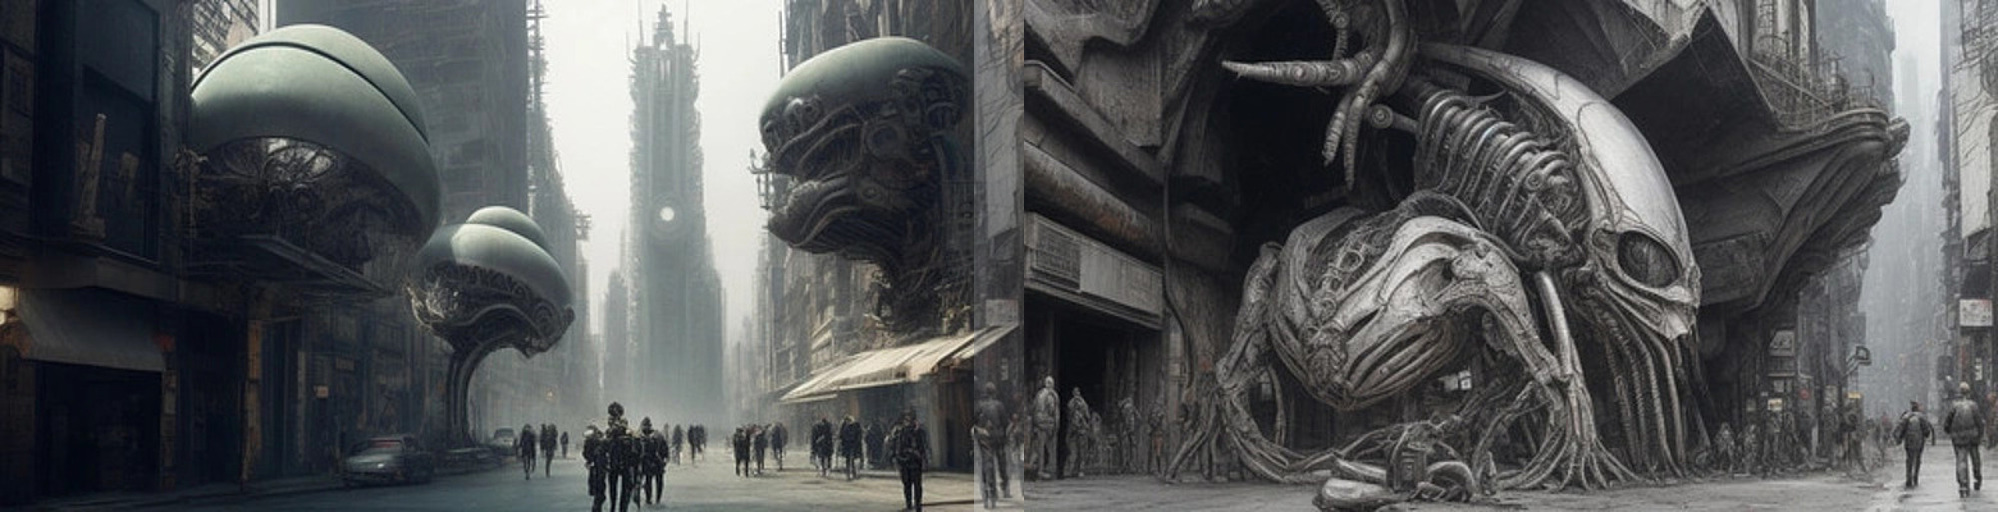

In [37]:
stitched_image

In [94]:
!cp /home/jack/Desktop/StoryMaker/downloadz/00135.jpg start.jpg

In [74]:
from PIL import Image, ImageFilter

# Open the image
img = Image.open("/home/jack/Desktop/StoryMaker/downloadz/00135.jpg")

# Create a new image with the same size as the original
new_img = Image.new("RGBA", img.size)

# Paste the original image onto the new image
new_img.paste(img, (0, 0))

# Create a mask with a gradient from 255 to 0
mask = Image.new("L", img.size, 255)
for x in range(img.width - 50, img.width):
    alpha = int(255 * (x - (img.width - 50)) / 50)
    for y in range(img.height):
        mask.putpixel((x, y), alpha)

# Blur the mask
mask = mask.filter(ImageFilter.GaussianBlur(10))

# Apply the mask to the new image
new_img.putalpha(mask)

# Create a new mask with a gradient from 255 to 0 over the rightmost edge of the image
mask2 = Image.new("L", img.size, 255)
for y in range(img.height):
    alpha = int(255 * (y - (img.height - 1)) / (img.height - 1))
    mask2.putpixel((img.width - 1, y), alpha)

# Apply the new mask to the new image
new_img.putalpha(mask2)

# Save the new image as a PNG file
new_img.save("feather_transparent.png")


In [77]:
from PIL import Image, ImageDraw, ImageOps

def feather_image(input_path, output_path, feather_width):
    try:
        # Open the input image
        input_image = Image.open(input_path)
        
        # Create a new image with transparency
        output_image = Image.new("RGBA", input_image.size, (0, 0, 0, 0))
        
        # Copy the original image onto the new image
        output_image.paste(input_image, (0, 0))
        
        # Create a gradient mask for feathering
        mask = Image.new("L", input_image.size, 255)
        draw = ImageDraw.Draw(mask)
        for y in range(input_image.height):
            alpha = int(255 * (1 - (y - 450) / feather_width))
            draw.line([(0, y), (input_image.width, y)], fill=alpha)
        
        # Apply the mask to the output image
        output_image.putalpha(mask)
        
        # Save the feathered image
        output_image.save(output_path)
        
        print("Feathering complete. Check the output image:", output_path)
        
    except Exception as e:
        print("An error occurred:", str(e))

if __name__ == "__main__":
    input_path = "/home/jack/Desktop/StoryMaker/downloadz/00135.jpg"
    output_path = "feathered.png"
    feather_width = 52
    feather_image(input_path, output_path, feather_width)


Feathering complete. Check the output image: feathered.png


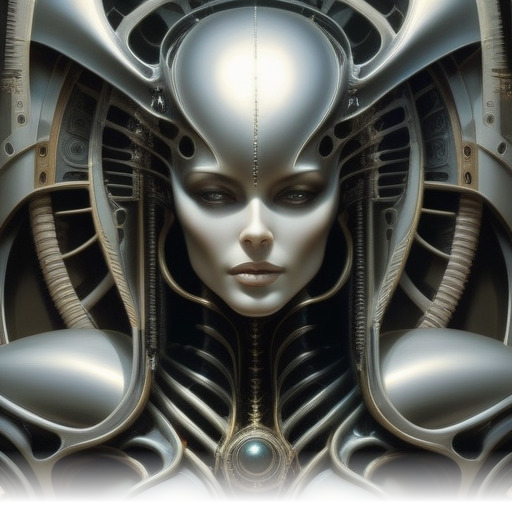

In [78]:
im = Image.open("feathered.png")
im

In [110]:
from PIL import Image, ImageDraw, ImageOps

def feather_image(input_path, output_path, feather_width):
    try:
        # Open the input image
        input_image = Image.open(input_path)
        
        # Create a new image with transparency
        output_image = Image.new("RGBA", input_image.size, (0, 0, 0, 0))
        
        # Copy the original image onto the new image
        output_image.paste(input_image, (0, 0))
        
        # Create a gradient mask for feathering
        mask = Image.new("L", input_image.size, 255)
        draw = ImageDraw.Draw(mask)
        for x in range(input_image.width - feather_width, input_image.width):
            alpha = int(255 * (1 - (x - (input_image.width - feather_width)) / feather_width))
            draw.line([(x, 0), (x, input_image.height)], fill=alpha)
        
        # Apply the mask to the output image
        output_image.putalpha(mask)
        
        # Save the feathered image
        output_image.save(output_path)
        
        print("Feathering complete. Check the output image:", output_path)
        
    except Exception as e:
        print("An error occurred:", str(e))

if __name__ == "__main__":
    input_path = "/home/jack/Desktop/StoryMaker/downloadz/00135.jpg"
    output_path = "feathered_right.png"
    feather_width = 52
    feather_image(input_path, output_path, feather_width)


Feathering complete. Check the output image: feathered_right.png


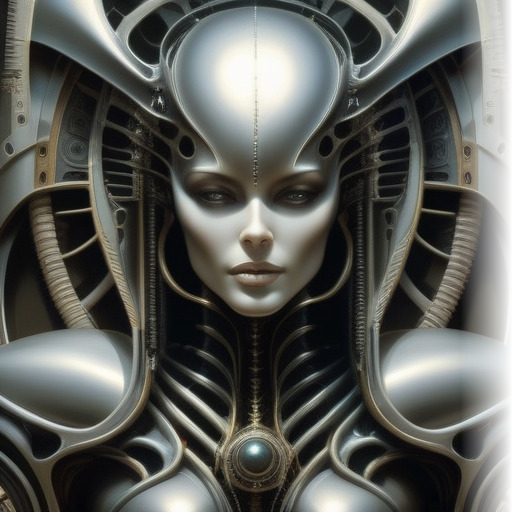

In [111]:
im = Image.open("feathered_right.png")
im

In [118]:
from PIL import Image, ImageDraw, ImageOps

def feather_left_side(input_path, output_path, feather_width):
    try:
        # Open the input image
        input_image = Image.open(input_path)
        
        # Create a new image with transparency
        output_image = Image.new("RGBA", input_image.size, (0, 0, 0, 0))
        
        # Copy the original image onto the new image
        output_image.paste(input_image, (0, 0))
        
        # Create a gradient mask for feathering the left side
        mask_left = Image.new("L", input_image.size, 255)
        #mask_left = Image.new("L", input_image.size), 255)
        #draw = ImageDraw.Draw(mask)
        draw_left = ImageDraw.Draw(mask_left)
        #for x in range(input_image.width - feather_width, input_image.width):
        #    alpha = int(255 * (1 - (x - (input_image.width - feather_width)) / feather_width))
        #    draw.line([(x, 0), (x, input_image.height)], fill=alpha)               
        for x in range(feather_width):
            alpha = int(255 * (1 - x / feather_width))
            draw_left.line([(x, 0), (x, input_image.height)], fill=alpha)
        
        # Apply the left mask to the output image
        output_image.paste((0, 0, 0, 0), (0, 0, feather_width, input_image.height))
        output_image.paste(ImageOps.colorize(mask_left, (0, 0, 0, 0), (0, 0, 0, 255)), (0, 0), mask_left)
        
        # Save the feathered image
        output_image.save(output_path)
        
        print("Left side feathering complete. Check the output image:", output_path)
        
    except Exception as e:
        print("An error occurred:", str(e))

if __name__ == "__main__":
    input_path = "/home/jack/Desktop/StoryMaker/downloadz/00135.jpg"
    output_path = "feathered_left.png"
    feather_width = 52
    feather_left_side(input_path, output_path, feather_width)


Left side feathering complete. Check the output image: feathered_left.png


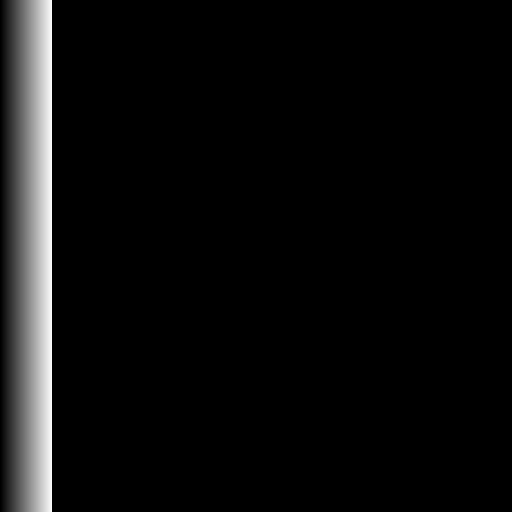

In [119]:
im = Image.open("feathered_left.png")
im

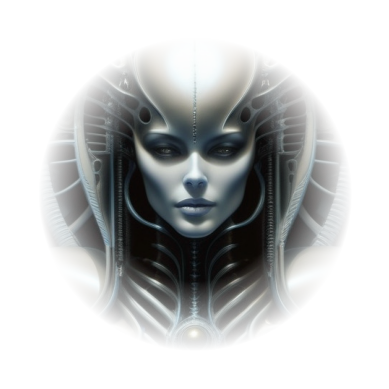

In [123]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import uuid
input_path = "/home/jack/Desktop/StoryMaker/downloadz/00135.jpg"
giger = cv2.imread(input_path)
l_row, l_col, nb_channel = giger.shape
rows, cols = np.mgrid[:l_row, :l_col]
radius = np.sqrt((rows - l_row/2)**2 + (cols - l_col/2)**2)
alpha_channel = np.zeros((l_row, l_col))
#change .8 to .6
r_min, r_max = 1./3 * radius.max(), 0.6 * radius.max()
alpha_channel[radius < r_min] = 1
alpha_channel[radius > r_max] = 0
gradient_zone = np.logical_and(radius >= r_min, radius <= r_max)
alpha_channel[gradient_zone] = (r_max - radius[gradient_zone])/(r_max - r_min)
alpha_channel *= 255
feathered = np.empty((l_row, l_col, nb_channel + 1), dtype=np.uint8)
feathered[..., :3] = astro[:]
feathered[..., -1] = alpha_channel[:]

# Display the image without plot elements
plt.axis('off')
plt.imshow(feathered)
plt.show()

# Save the image without plot elements
output_path = "feathered_image.png"
plt.imsave(output_path, feathered[..., :3], format="png")


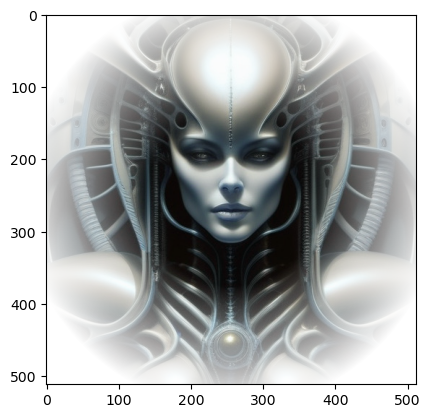

In [121]:
import numpy as np
from skimage import data
import cv2
input_path = "/home/jack/Desktop/StoryMaker/downloadz/00135.jpg"
astro = cv2.imread(input_path)
l_row, l_col, nb_channel = astro.shape
rows, cols = np.mgrid[:l_row, :l_col]
radius = np.sqrt((rows - l_row/2)**2 + (cols - l_col/2)**2)
alpha_channel = np.zeros((l_row, l_col))
r_min, r_max = 1./3 * radius.max(), 0.8 * radius.max()
alpha_channel[radius < r_min] = 1
alpha_channel[radius > r_max] = 0
gradient_zone = np.logical_and(radius >= r_min, radius <= r_max)
alpha_channel[gradient_zone] = (r_max - radius[gradient_zone])/(r_max - r_min)
alpha_channel *= 255
feathered = np.empty((l_row, l_col, nb_channel + 1), dtype=np.uint8)
feathered[..., :3] = astro[:]
feathered[..., -1] = alpha_channel[:]

import matplotlib.pyplot as plt
plt.imshow(feathered)
plt.show()